# Assignment 1

## Question 2

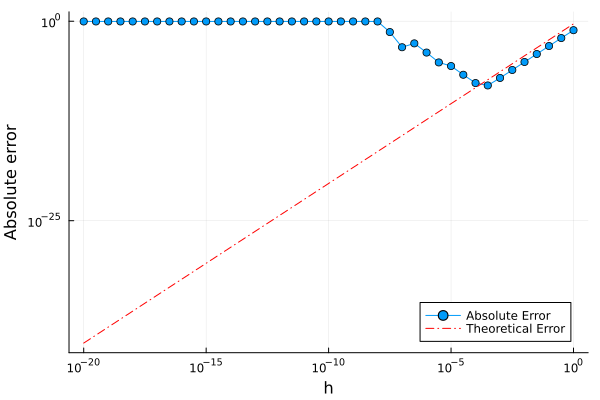

In [30]:
# 2b

# Define initial variables
x0 = 1.2
f0 = sin(x0)
fp = -sin(x0)
i = -20:0.5:0
h = 10 .^ i

# Calculate errors
abs_err = abs.(fp .- (sin.(x0 .+ h) .+ sin.(x0 .- h) .- 2*f0) ./ h.^2)
d_err = (abs(fp) .* h.^2 )/2 #discretization error - note that f(x_0)=f''(x_0)

# Plot the results
using Plots
plot(h, abs_err, label="Absolute Error", marker=:circ,xscale=:log10, yscale=:log10,legend=:bottomright)
plot!(h, d_err, label="Theoretical Error", line=:dashdot, color=:red,legend=:bottomright)

# Set plot labels
xlabel!("h")
ylabel!("Absolute error")



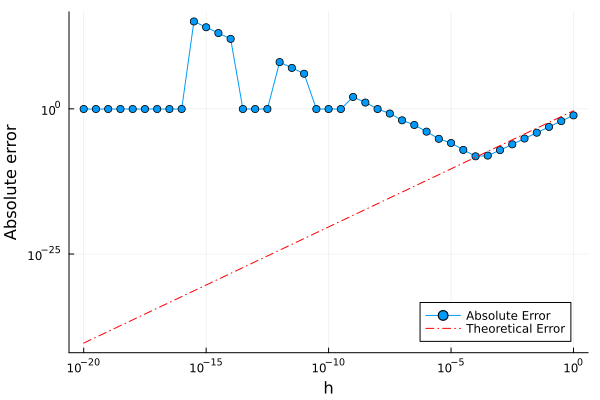

In [31]:
# 2d

# Define initial variables
x0 = 1.2
f0 = sin(x0)
fp = -sin(x0)
i = -20:0.5:0
h = 10 .^ i

# Calculate errors
abs_err = abs.(fp .- (sin.(x0 .+ h) .- 2*f0 .+ sin.(x0 .- h)) ./ h.^2)
d_err = (abs(fp) .* h.^2 )/2 #discretization error - note that f(x_0)=f''(x_0)

# Plot the results
using Plots
plot(h, abs_err, label="Absolute Error", marker=:circ,xscale=:log10, yscale=:log10,legend=:bottomright)
plot!(h, d_err, label="Theoretical Error", line=:dashdot, color=:red,legend=:bottomright)

# Set plot labels
xlabel!("h")
ylabel!("Absolute error")



## Question 3

In [32]:
# 3a

real_sum = Float32(pi^2 / 6)
approx_small_to_large = sum(Float32(1/n^2) for n in 1:10^9)
approx_large_to_small = sum(Float32(1/n^2) for n in 10^9:-1:1)
absolute_error_small_to_large = abs(real_sum - approx_small_to_large)
absolute_error_large_to_small = abs(real_sum - approx_large_to_small)
relative_error_small_to_large = absolute_error_small_to_large / real_sum
relative_error_large_to_small = absolute_error_large_to_small / real_sum

println(approx_small_to_large, " ", absolute_error_small_to_large, " ", relative_error_small_to_large)
println(approx_large_to_small, " ", absolute_error_large_to_small, " ", relative_error_large_to_small)
println(real_sum)


1.6447253 0.00020873547 0.00012689595
1.644934 0.0 0.0
1.644934


## Question 5

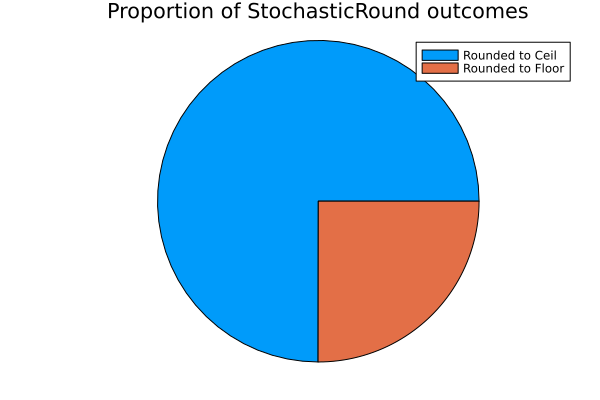

In [6]:
using Distributions
using Plots;

x = 2.75;
x_ceil = ceil(x);
x_floor = floor(x);
ceil_count = 0;
floor_count = 0;

function StochasticRound(x)
    # extract the decimal portion
    r=trunc(x)
    q=abs(x-r)
    # draw a value 0 or 1 with probability
    # based on how close we already are
    dx = wsample(0:1,[1-q,q],1)
     # make it negative if x is negative
     if(x<0)
         dx=-dx
     end
     # return our new value
     r+dx[1]
end

for i in 1:10^6
    rounded = StochasticRound(x);
    if (rounded == x_ceil)
        ceil_count += 1;
    end
    if (rounded == x_floor)
        floor_count += 1;
    end
end

x = ["Rounded to Ceil", "Rounded to Floor"];
y = [ceil_count, floor_count];

pie(x, y, title="Proportion of StochasticRound outcomes")